In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'  # Example dataset
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
data = data.rename(columns={'Passengers': 'Value'})
data['Time'] = range(len(data))
data


,Value,Time
Month,,
1949-01-01,112,0
1949-02-01,118,1
1949-03-01,132,2
1949-04-01,129,3
1949-05-01,121,4
...,...,...
1960-08-01,606,139
1960-09-01,508,140
1960-10-01,461,141


In [3]:
X = data[['Time']]  # Independent variable (Time index)
y = data['Value']  # Dependent variable (Value of the time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
data['Prediction'] = model.predict(data[['Time']])

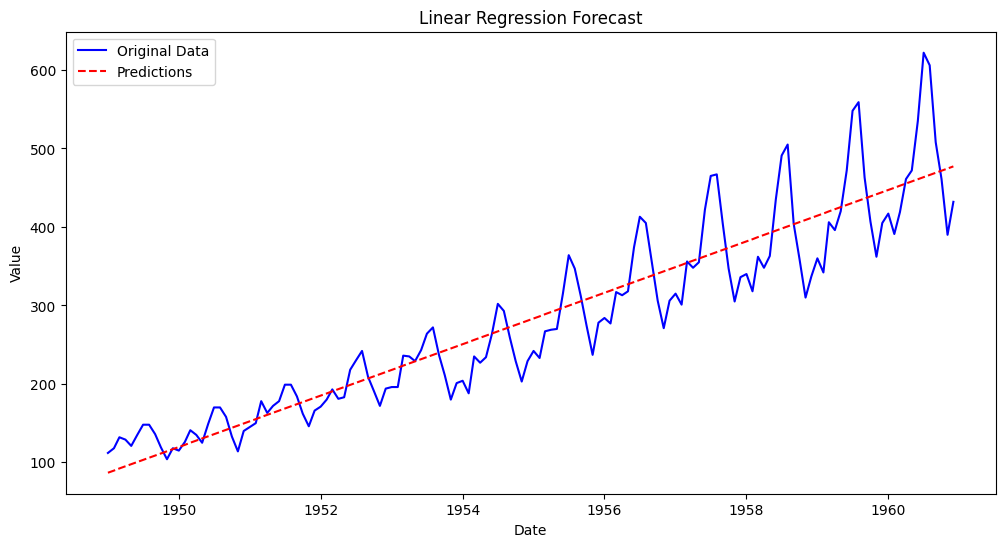

In [6]:

plt.figure(figsize=(12, 6))
plt.plot(data['Value'], label='Original Data', color='blue')
plt.plot(data['Prediction'], label='Predictions', color='red', linestyle='--')
plt.title('Linear Regression Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [7]:

mse = mean_squared_error(y_test, model.predict(X_test))
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 1567.7349896280214
